# House Prices Advanced Regression Techniques
----------

## Summary
There are many cities that have open dataset on housing, some of which are more complete than others. There are many things that could be investigated when it comes to housing data but the most common one is predicting the prices.  In this case we are going to be working on the Ames Housing dataset, compiled by Dean De Cock, to predict the missing house prices using machine learning.  

## Goal
Use the dataset after normalization, filling in missing values and adding new features with a linear regression model to predict sales prices.

## Method
There are a large number of features in this dataset,around 38, and in order to create a good prediciton there will have to be a fair amount of work to do inadvance.  Combining the train and test set will means changes only need to be done once across both datasets. 

* Correlation
* Feature Exploration
* Missing Values
* Data Normilization
* Feature Engineering
* Assembling dataset
* Prediction

There should be several good indicators for sale price, the challenge will be in normalization of the data and feature engineering.

In [1]:
# Handle table-like data and matrices
import numpy as np
import pandas as pd
import math

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LassoLarsCV,Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale, OneHotEncoder
from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

# Visualisation
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline

C:\Users\kefor\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# get csv files as a DataFrame
traindf = pd.read_csv("~/Desktop/Kaggle House Prices Advanced Regression Techniques/train.csv")
testdf = pd.read_csv("~/Desktop/Kaggle House Prices Advanced Regression Techniques/test.csv")

#traindf = pd.read_csv("../input/train.csv")
#testdf = pd.read_csv("../input/test.csv")

In [3]:
# create a single dataframe of both the training and testing data
wholedf = pd.concat([traindf,testdf])

In [4]:
wholedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

In [5]:
wholedf.head(5)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


## The Data
-----------
The data has a wid range of interger, float and categorical information.  In the end those will end up as numeric, but not quite yet.  There are a couple of groupings of different types of measurements.

### Neighborhood
Information about the neighborhood, zoning and lot.  
* Examples: MSSubClass, LandContour, Neighborhood, BldgType

### Dates
Time based data about when it was built, remodelled or sold.
* Exmple: YearBuilt, YearRemodAdd, GarageYrBlt, YrSold

### Quality/Condition
There are categorical assesments of the various features of the houses, most likely from the property assessor.
* Example:PoolQC, SaleCondition,GarageQual, HeatingQC

### Property Features
Categorical colletion of additional features and attributes of the building
* Example: Foundation, Exterior1st, BsmtFinType1,Utilities 

### Square Footage
Area measurment of section of the building and features like porches and lot area(which is in acres)
* Example: TotalBsmtSF, GrLivArea, GarageArea, PoolArea, LotArea

### Room/Feature Count
Quantative counts of features (versus categorical)like rooms, prime canidates for feature engineering
* Example: FullBath, BedroomAbvGr, Fireplaces,GarageCars

### Pricing
Monetary values, one of which is the sales price we are trying to determine
* Examples: SalePrice, MiscVal

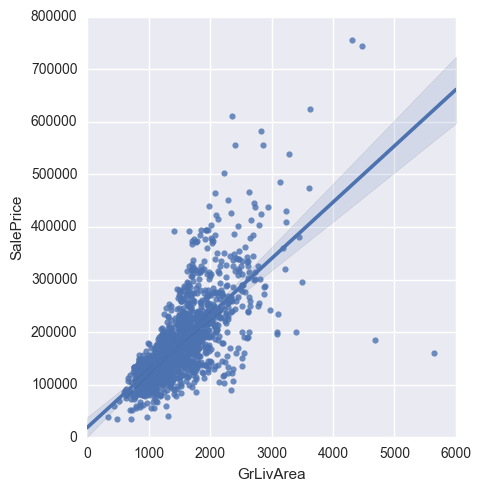

In [6]:
sns.lmplot(x="GrLivArea", y="SalePrice", data=wholedf);
plt.ylim(0,)
plt.show()

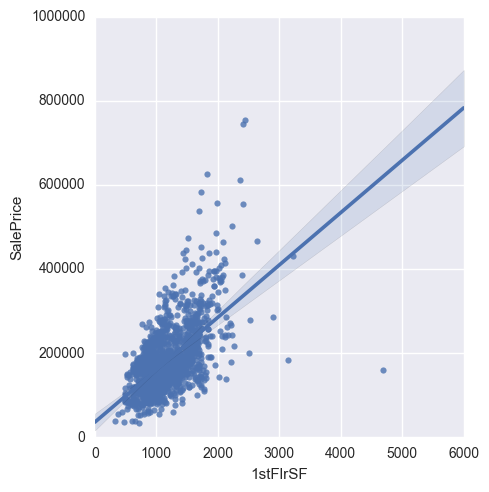

In [7]:
sns.lmplot(x="1stFlrSF", y="SalePrice", data=wholedf);
plt.ylim(0,)
plt.show()

Correlation
--------------
A quick correlation check is the best way to the heart of the data set.  There is a far amount of correlation for sales price with a couple of variables:

* OverallQual - 0.790982
* GrLivArea -  0.708624
* GarageCars -  0.640409
* GarageArea -  0.623431
* TotalBsmtSF -  0.613581
* 1stFlrSF -  0.605852
* FullBath -  0.560664
* TotRmsAbvGrd -  0.533723
* YearBuilt  - 0.522897
* YearRemodAdd -  0.507101

Below I used the training set data, not the whole dataset, for correlation to sale price as only that would have the sale price value for each row.  The heatmap shows correlation for the whole dataset against itself.

In [8]:
traincorr = traindf.corr()['SalePrice']
# convert series to dataframe so it can be sorted
traincorr = pd.DataFrame(traincorr)
# correct column label from SalePrice to correlation
traincorr.columns = ["Correlation"]
# sort correlation
traincorr2 = traincorr.sort_values(by=['Correlation'], ascending=False)
traincorr2.head(15)

,Correlation
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


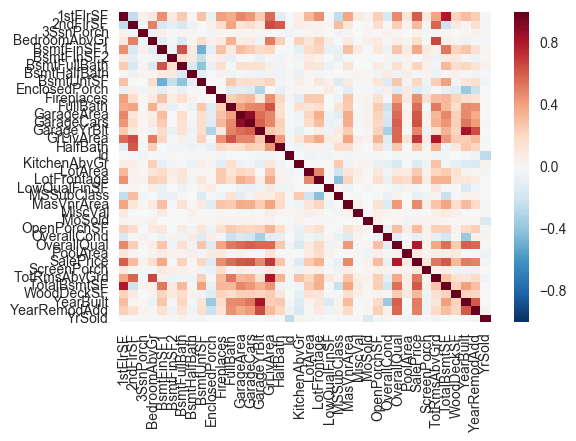

In [9]:
corr = wholedf.corr()
sns.heatmap(corr)
plt.show()

Missing Values
--------------------
There is a wide selectionof missing values.  First it make sense to hit the low hanging fruit first and deal with those that are missing a value or two, then work through what is left.  Some of these look to be missing values not because they don't have data but rather because the building was missing that feature, like a garage.  Using Pandas Get.Dummies will sort that problem out.

In [10]:
countmissing = wholedf.isnull().sum().sort_values(ascending=False)
percentmissing = (wholedf.isnull().sum()/wholedf.isnull().count()).sort_values(ascending=False)
wholena = pd.concat([countmissing,percentmissing], axis=1)
wholena.head(36)

,0,1
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageFinish,159,0.054471
GarageCond,159,0.054471
GarageQual,159,0.054471


Replacing Missing Data
------------
For the categorical information that is missing a single values a quick check shows which ones are dominant adn manually replace the missing values.  For most it is a quick process, I commented out the Python as I had in order to keep this shorter but feel free to uncomment and take a look.

In [11]:
#wholedf[["Utilities", "Id"]].groupby(['Utilities'], as_index=False).count()
wholedf['Utilities'] = wholedf['Utilities'].fillna("AllPub")

# wholedf[["Electrical", "Id"]].groupby(['Electrical'], as_index=False).count()
wholedf['Electrical'] = wholedf['Electrical'].fillna("SBrkr")

# wholedf[["Exterior1st", "Id"]].groupby(['Exterior1st'], as_index=False).count()
wholedf['Exterior1st'] = wholedf['Exterior1st'].fillna("VinylSd")

#wholedf[["Exterior2nd", "Id"]].groupby(['Exterior2nd'], as_index=False).count()
wholedf['Exterior2nd'] = wholedf['Exterior2nd'].fillna("VinylSd")

In [12]:
# Missing interger values replace with the median in order to return an integer
wholedf['BsmtFullBath']= wholedf.BsmtFullBath.fillna(wholedf.BsmtFullBath.median())
wholedf['BsmtHalfBath']= wholedf.BsmtHalfBath.fillna(wholedf.BsmtHalfBath.median())
wholedf['GarageCars']= wholedf.GarageCars.fillna(wholedf.GarageCars.median())

# Missing float values were replaced with the mean for accuracy 
wholedf['BsmtUnfSF']= wholedf.BsmtUnfSF.fillna(wholedf.BsmtUnfSF.mean())
wholedf['BsmtFinSF2']= wholedf.BsmtFinSF2.fillna(wholedf.BsmtFinSF2.mean())
wholedf['BsmtFinSF1']= wholedf.BsmtFinSF1.fillna(wholedf.BsmtFinSF1.mean())
wholedf['GarageArea']= wholedf.GarageArea.fillna(wholedf.GarageArea.mean())
wholedf['MasVnrArea']= wholedf.MasVnrArea.fillna(wholedf.MasVnrArea.mean())

### Infer Missing Values
Some of the missing values can be inferred from other values for that given property.  The GarageYearBuilt would have to be at the earlierst the year the house was built.  Likewise TotalBasementSQFeet would have to be equal to the first floor square footage.  

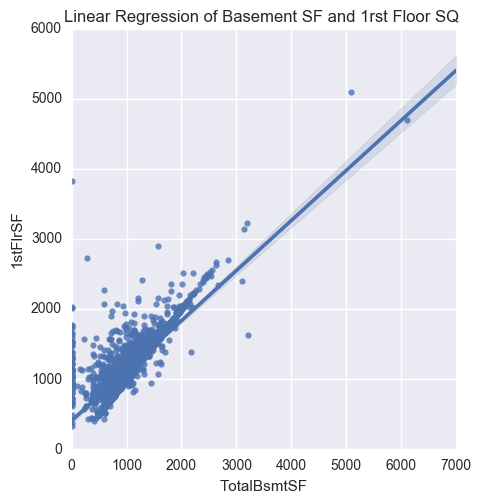

In [13]:
wholedf.GarageYrBlt.fillna(wholedf.YearBuilt, inplace=True)
wholedf.TotalBsmtSF.fillna(wholedf['1stFlrSF'], inplace=True)

sns.lmplot(x="TotalBsmtSF", y="1stFlrSF", data=wholedf)
plt.title("Linear Regression of Basement SF and 1rst Floor SQ ")
plt.xlim(0,)
plt.ylim(0,)
plt.show()

### Lot Frontage

Lot Frontage is a bit trickery.  There are 486 missing values (17% of total values) but a quick check of correlation shows that there are surprisingly few features that have high correlation outside of Lot Area.  

Logic dictates that the Lot Area should have a linear relation to Lot Frontage.  A quick check with a linear regression of the relationship between Lot Frontage and the square root of Lot Area shows we are in the ballpark.

In [14]:
lot = wholedf[['LotArea','LotConfig','LotFrontage','LotShape']]
lot = pd.get_dummies(lot)
lot.corr()['LotFrontage']

LotArea              0.489896
LotFrontage          1.000000
LotConfig_Corner     0.257028
LotConfig_CulDSac   -0.104612
LotConfig_FR2       -0.056992
LotConfig_FR3        0.027509
LotConfig_Inside    -0.162484
LotShape_IR1         0.151502
LotShape_IR2        -0.011356
LotShape_IR3         0.139550
LotShape_Reg        -0.164639
Name: LotFrontage, dtype: float64

In [15]:
lot["LotAreaUnSq"] = np.sqrt(lot['LotArea'])

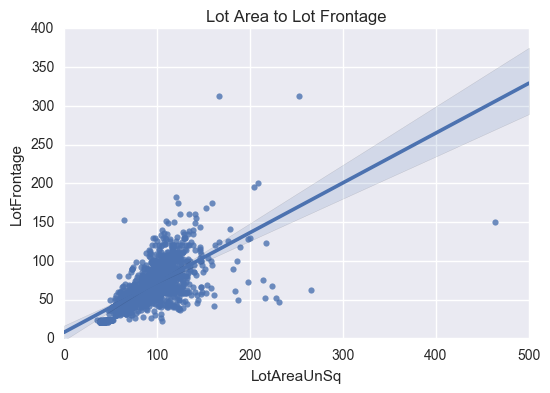

In [16]:
sns.regplot(x="LotAreaUnSq", y="LotFrontage", data=lot);
plt.xlim(0,)
plt.ylim(0,)
plt.title("Lot Area to Lot Frontage")
plt.show()

In [17]:
# Remove all lotfrontage is missing values
lot = lot[lot['LotFrontage'].notnull()]
# See the not null values of LotFrontage
lot.describe()['LotFrontage']

count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [18]:
wholedf['LotFrontage']= wholedf.LotFrontage.fillna(np.sqrt(wholedf.LotArea))
wholedf['LotFrontage']= wholedf['LotFrontage'].astype(int)

C:\Users\kefor\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


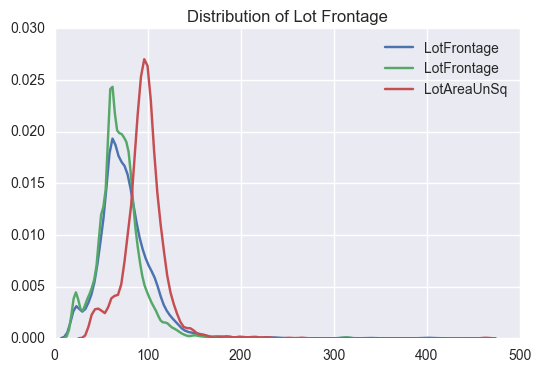

In [19]:
# Distribution of values after replacement of missing frontage
sns.kdeplot(wholedf['LotFrontage']);
sns.kdeplot(lot['LotFrontage']);
sns.kdeplot(lot['LotAreaUnSq']);
plt.title("Distribution of Lot Frontage")
plt.show()

In [20]:
countmissing = wholedf.isnull().sum().sort_values(ascending=False)
percentmissing = (wholedf.isnull().sum()/wholedf.isnull().count()).sort_values(ascending=False)
wholena = pd.concat([countmissing,percentmissing], axis=1)
wholena.head(3)

,0,1
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169


## Feaure Engineering
-----------------------
Now it is time to create some new features and see how they can help the model's accuracy.  First are a couple of macro creations, like adding all the internal and external square footage together to get the total living space including both floors, garage and external spaces.

In [21]:
Livingtotalsq = wholedf['TotalBsmtSF'] + wholedf['1stFlrSF'] + wholedf['2ndFlrSF'] + wholedf['GarageArea'] + wholedf['WoodDeckSF'] + wholedf['OpenPorchSF']
wholedf['LivingTotalSF'] = Livingtotalsq

# Total Living Area divided by LotArea
wholedf['PercentSQtoLot'] = wholedf['LivingTotalSF'] / wholedf['LotArea']

# Total count of all bathrooms including full and half through the entire building
wholedf['TotalBaths'] = wholedf['BsmtFullBath'] + wholedf['BsmtHalfBath'] + wholedf['HalfBath'] + wholedf['FullBath']

# Percentage of total rooms are bedrooms
wholedf['PercentBedrmtoRooms'] = wholedf['BedroomAbvGr'] / wholedf['TotRmsAbvGrd']

# Number of years since last remodel, if there never was one it would be since it was built
wholedf['YearSinceRemodel'] = 2016 - ((wholedf['YearRemodAdd'] - wholedf['YearBuilt']) + wholedf['YearBuilt'])

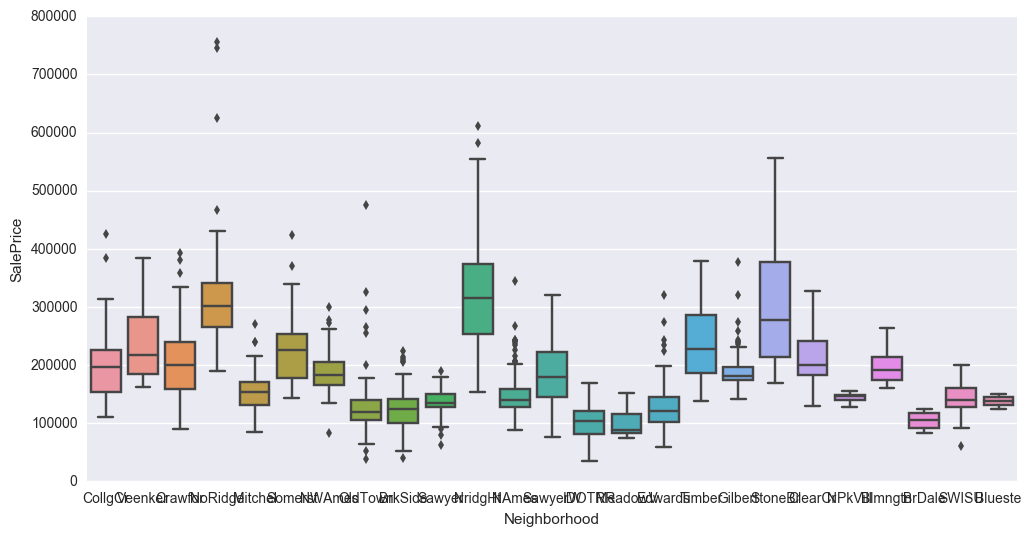

In [22]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice',  data = wholedf)
#xt = plt.xticks(rotation=45)

### Features
This is a way to edit what feeatures are included in the final model.  I played a bit with which to include, and I have a feeling I may come back to this to re-engineer it.  

In [23]:
pricing1 = wholedf[['Id','SalePrice','MiscVal']]

neigh = wholedf[['Neighborhood','MSZoning','MSSubClass','BldgType','HouseStyle']]

dates = wholedf[['YearBuilt','YearRemodAdd','GarageYrBlt','YearSinceRemodel']]

quacon = wholedf[['ExterQual','BsmtQual','PoolQC','Condition1','Condition2','SaleCondition',
                  'BsmtCond','ExterCond','GarageCond','KitchenQual','GarageQual','HeatingQC','OverallQual','OverallCond']]

features =  wholedf[['Foundation','RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
                     'MiscFeature','PavedDrive','Utilities',
                     'Heating','CentralAir','Electrical','Fence']]

sqfoot = wholedf[['LivingTotalSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea',
                  'GarageArea','WoodDeckSF','OpenPorchSF','LotArea','PercentSQtoLot','LowQualFinSF']]

roomfeatcount = wholedf[['PercentBedrmtoRooms','TotalBaths','FullBath','HalfBath',
                         'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageType','EnclosedPorch']]

# Splits out sale price for the training set and only has not null values
pricing = wholedf['SalePrice']
pricing = pricing[pricing.notnull()]

# Bringing it all together
wholedf = pd.concat([pricing1,neigh,dates,quacon,features,sqfoot,roomfeatcount], axis=1)

### Categorical Conversion
In order for the model to understand categories, first replace all the categorical data with boolean values through Pandas get_dummies.  

In [24]:
wholedf = pd.get_dummies(wholedf)

## Split Database
--------
Time to split the database back into two parts, one with sales price and one without

In [25]:
train_X = wholedf[wholedf['SalePrice'].notnull()]
del train_X['SalePrice']
test_X =  wholedf[wholedf['SalePrice'].isnull()]
del test_X['SalePrice']

## Training/Test Dataset

Create training set assembly

In [26]:
# Create all datasets that are necessary to train, validate and test models
train_valid_X = train_X
train_valid_y = pricing
test_X = test_X
train_X , valid_X , train_y , valid_y = train_test_split( train_valid_X , train_valid_y , train_size = .7 )

## Model
Here are a variety of models you can try, many performed extremely poorly, Lasso was the best but I plan to go back to this and do further work on refining my features, like log regressions and normalizations.  

In [27]:
# model = RandomForestRegressor()
model = Ridge()
# model = LassoLarsCV()

# Models that performed substantially worse
# model = LinearSVC()
# model = KNeighborsClassifier(n_neighbors = 3)
# model = GaussianNB()
# model = LogisticRegression()
# model = SVC()

## Fit/Accurancy

In [28]:
model.fit( train_X , train_y )

# Print the Training Set Accuracy and the Test Set Accuracy in order to understand overfitting
print (model.score( train_X , train_y ) , model.score( valid_X , valid_y ))

0.907396644849 0.880946107041


In [29]:
id = test_X.Id
result = model.predict(test_X)

# output = pd.DataFrame( { 'id': id , 'SalePrice': result}, columns=['id', 'SalePrice'] )
output = pd.DataFrame( { 'id': id , 'SalePrice': result} )
output = output[['id', 'SalePrice']]

output.to_csv("solution.csv", index = False)
output.head(10)

,id,SalePrice
0,1461,105873.635718
1,1462,163330.295053
2,1463,175425.337435
3,1464,198162.123995
4,1465,207754.889520
5,1466,173967.734114
6,1467,179900.494828
7,1468,165963.957501
8,1469,188020.732428
9,1470,119489.505063


## Conclusion

In many ways the model did not feel solid, every time I re-ran it the score changed and I would like to go back and normalized some of the variables, but perhaps after the competition is done. Linear Regressions are very different to work with compared to decisions trees and I feel like the model is a bit,... "fragile"?  I will circle back around at a later date and try to get a better grasp on it and make my model more confident.  

https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models

